Im ersten Schritt werden die Signaldaten als Dataframe eingelesen.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score


Alle Monte-Carlo Parameter, also Parameter mit Corsica, Weight oder MC im Namen werden entfernt.

In [2]:
df_signal = pd.read_csv('data/signal.csv', delimiter=';')

columns = ['CorsikaWeightMap.SpectrumType',
 'CorsikaWeightMap.TimeScale', 'CorsikaWeightMap.AreaSum',
 'CorsikaWeightMap.Atmosphere',
 'CorsikaWeightMap.CylinderLength',
 'CorsikaWeightMap.CylinderRadius',
 'CorsikaWeightMap.DiplopiaWeight',
 'CorsikaWeightMap.EnergyPrimaryMax',
 'CorsikaWeightMap.EnergyPrimaryMin',
 'CorsikaWeightMap.FluxSum',
 'CorsikaWeightMap.Multiplicity',
 'CorsikaWeightMap.SpectralIndexChange',
 'CorsikaWeightMap.Weight', 'I3MCWeightDict.ActiveLengthAfter',
 'I3MCWeightDict.ActiveLengthBefore',
 'I3MCWeightDict.AutoExtension',
 'I3MCWeightDict.EnergyLost',
 'I3MCWeightDict.GeneratorVolume',
 'I3MCWeightDict.InIceNeutrinoEnergy',
 'I3MCWeightDict.InjectionSurfaceR',
 'I3MCWeightDict.InteractionColumnDepth',
 'I3MCWeightDict.InteractionCrosssection',
 'I3MCWeightDict.InteractionType',
 'I3MCWeightDict.LengthInVolume',
 'I3MCWeightDict.MaxAzimuth', 
 'I3MCWeightDict.MaxEnergyLog',
 'I3MCWeightDict.MaxZenith',
 'I3MCWeightDict.MinAzimuth',
 'I3MCWeightDict.MinEnergyLog',
 'I3MCWeightDict.MinZenith',
 'I3MCWeightDict.NeutrinoImpactParameter',
 'I3MCWeightDict.OneWeight',
 'I3MCWeightDict.PowerLawIndex',
 'I3MCWeightDict.PrimaryNeutrinoEnergy',
 'I3MCWeightDict.RangeInMeter',
 'I3MCWeightDict.RangeInMeterWaterEquiv',
 'I3MCWeightDict.TotalColumnDepth',
 'I3MCWeightDict.TotalCrosssection',
 'I3MCWeightDict.TotalDetectionLength',
 'I3MCWeightDict.TotalInteractionProbability',
 'I3MCWeightDict.TotalInteractionProbabilityWeight',
 'I3MCWeightDict.TotalPropagationProbability',
 'I3MCWeightDict.TrueActiveLengthAfter',
 'I3MCWeightDict.TrueActiveLengthBefore',
 'MCECenter.value',
 'MCMostEnergeticInIce.x',
 'MCMostEnergeticInIce.y',
 'MCMostEnergeticInIce.z',
 'MCMostEnergeticInIce.time',
 'MCMostEnergeticInIce.zenith',
 'MCMostEnergeticInIce.azimuth',
 'MCMostEnergeticInIce.energy',
 'MCMostEnergeticInIce.length',
 'MCMostEnergeticInIce.type',
 'MCMostEnergeticInIce.fit_status',
 'MCMostEnergeticTrack.x',
 'MCMostEnergeticTrack.y',
 'MCMostEnergeticTrack.z',
 'MCMostEnergeticTrack.time',
 'MCMostEnergeticTrack.zenith',
 'MCMostEnergeticTrack.azimuth',
 'MCMostEnergeticTrack.energy',
 'MCMostEnergeticTrack.length',
 'MCMostEnergeticTrack.type',
 'MCMostEnergeticTrack.fit_status',
 'MCPrimary1.x',
 'MCPrimary1.y',
 'MCPrimary1.z',
 'MCPrimary1.time',
 'MCPrimary1.zenith',
 'MCPrimary1.azimuth',
 'MCPrimary1.energy',
 'MCPrimary1.length',
 'MCPrimary1.type',
 'MCPrimary1.fit_status',
 'Weight.HoSa',
 'Weight.Ho',
 'Weight.Sa',
 'Weight.Astro2', 
 'MPEFitHighNoiseFitParams.logl', 
 'MPEFitHighNoiseFitParams.rlogl']

df_signal.drop(columns, axis = 1, inplace = True)
#dfs.columns.values.tolist()
# weight, mc und Corsika entfernt

#dfs.describe()

Für die Backgrounddaten wird genauso verfahren.

In [3]:
df_background = pd.read_csv('data/background.csv', delimiter=';')

columns = ['CorsikaWeightMap.AreaSum',
 'CorsikaWeightMap.Atmosphere',
 'CorsikaWeightMap.CylinderLength',
 'CorsikaWeightMap.CylinderRadius',
 'CorsikaWeightMap.DiplopiaWeight',
 'CorsikaWeightMap.EnergyPrimaryMax',
 'CorsikaWeightMap.EnergyPrimaryMin',
 'CorsikaWeightMap.FluxSum',
 'CorsikaWeightMap.Multiplicity',
 'CorsikaWeightMap.ParticleType',
 'CorsikaWeightMap.Polygonato',
 'CorsikaWeightMap.PrimarySpectralIndex',
 'CorsikaWeightMap.TimeScale',
 'CorsikaWeightMap.Weight', 
 'MCECenter.value',
 'MCMostEnergeticInIce.x',
 'MCMostEnergeticInIce.y',
 'MCMostEnergeticInIce.z',
 'MCMostEnergeticInIce.time',
 'MCMostEnergeticInIce.zenith',
 'MCMostEnergeticInIce.azimuth',
 'MCMostEnergeticInIce.energy',
 'MCMostEnergeticInIce.length',
 'MCMostEnergeticInIce.type',
 'MCMostEnergeticInIce.fit_status',
 'MCPrimary1.x',
 'MCPrimary1.y',
 'MCPrimary1.z',
 'MCPrimary1.time',
 'MCPrimary1.zenith',
 'MCPrimary1.azimuth',
 'MCPrimary1.energy',
 'MCPrimary1.length',
 'MCPrimary1.type',
 'MCPrimary1.fit_status', 
 'Weight.Ho',
 'Weight.Sa',
 'Weight.Astro2',
 'Weight.HoSa', 
 'MPEFitHighNoiseFitParams.logl', 
 'MPEFitHighNoiseFitParams.rlogl']

df_background.drop(columns, axis = 1, inplace = True)
#dfb.columns.values.tolist()
# weight, mc und Corsika entfernt

Die anderen haben mehr gelöscht als bei uns vorgegeben ist also probiere ich das mal aus

In [4]:
df_signal.replace({np.inf : np.nan, -np.inf : np.nan}, value=None, inplace = True)
df_background.replace({np.inf : np.nan, -np.inf : np.nan}, value=None, inplace = True)

df_signal.dropna(axis=1, how='any', inplace = True)
df_background.dropna(axis=1, how='any', inplace = True)

Anschließend wird üerprüft ob es Messungen mit $\pm \inf$ als Wert gibt 

In [5]:
# Attribute alphybetisch sortieren und vergleichen
# oder
# mergen und dimensionen vergleichen

count = np.isinf(df_signal).values.sum()
print("Signal contains " + str(count) + " infinite values")

count = np.isinf(df_background).values.sum()
print("Background contains " + str(count) + " infinite values")
# NaN and Inf removed

Signal contains 0 infinite values
Background contains 0 infinite values


Attribute welche nur in den Signakken oder Untergrund vorkommen werden entfernt

In [6]:
col_signal = df_signal
col_background = df_background

for feature in col_signal:
    if feature not in col_background:
        df_signal.drop(feature, axis=1, inplace = True)

for feature in col_background:
    if feature not in col_signal:
        df_background.drop(att, axis=1, inplace = True)

Untergrund und Signal werden in einen Dataframe geschrieben

In [7]:
# nächstes sets joinen und attributselektion
data = [df_signal, df_background]
df = pd.concat(data)
df

,HitMultiplicityValues.n_hit_strings,HitMultiplicityValues.n_hit_doms,HitMultiplicityValues.n_hit_doms_one_pulse,HitStatisticsValues.cog_z_sigma,HitStatisticsValues.min_pulse_time,HitStatisticsValues.max_pulse_time,HitStatisticsValues.q_max_doms,HitStatisticsValues.z_min,HitStatisticsValues.z_max,HitStatisticsValues.z_mean,...,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.fit_status,NewID,label,NewAtt.radius,NewAtt.DirectEllipse,NewAtt.DeltaZd,NewAtt.emptyness,NewAtt.SepDevide,NewAtt.SPEBayVerRadius,NewAtt.SplineVerRadius
0,18.0,61.0,51.0,56.918818,9620.149414,12554.148438,13.438909,-469.140015,-149.070007,-316.056395,...,0.0,64.0,1.0,147.780226,44.468594,0.056349,1.0,0.817921,281.014746,176.054897
1,4.0,17.0,12.0,107.009602,9424.810547,10866.173828,3.103700,-504.160004,-145.589996,-303.344118,...,0.0,314.0,1.0,366.974384,39.249526,0.025288,1.0,0.581986,425.929142,379.645109
2,7.0,19.0,16.0,33.235703,9870.542969,12140.942383,7.148956,78.580002,227.500000,135.803158,...,0.0,488.0,1.0,265.063779,44.492746,0.001074,1.0,1.101785,236.851388,294.405333
3,10.0,20.0,16.0,110.222554,9793.984375,12979.283203,1.960272,-485.540009,-129.229996,-324.374998,...,0.0,605.0,1.0,240.998469,23.536249,0.054007,1.0,2.058378,648.741666,218.159001
4,6.0,19.0,14.0,21.467337,14054.889648,16228.914062,2.931422,158.130005,257.640015,208.761580,...,0.0,785.0,1.0,444.019109,43.249092,0.039559,1.0,1.092478,498.886826,436.369962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10.0,30.0,22.0,49.068142,9862.347656,12837.249023,7.136857,77.269997,353.049988,278.057001,...,0.0,5026627.0,0.0,384.161308,56.746526,0.066755,1.0,1.065546,381.733775,415.379617
19996,6.0,17.0,7.0,27.252518,9871.945312,11592.666992,7.936371,397.709991,498.440002,450.434705,...,0.0,5026954.0,0.0,411.032490,14.620175,0.183951,1.0,0.618110,234.191814,414.472082
19997,7.0,15.0,12.0,29.481219,9482.490234,11569.260742,4.592563,365.029999,499.600006,459.412000,...,0.0,5027627.0,0.0,454.095176,12.021038,0.091047,1.0,1.375347,472.261594,463.704244
19998,11.0,35.0,21.0,33.178474,9886.361328,12320.651367,18.827343,-506.440002,-334.000000,-456.747714,...,0.0,5027731.0,0.0,504.317768,12.251320,0.019665,1.0,0.357305,577.475875,529.419863


entferne konstannte features

In [8]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [9]:
count = np.isnan(df).values.sum()
print("Data contains " + str(count) + " NaNs")

Data contains 0 NaNs


Jetzt kommt der Teil mit den Machine learning..
Der erste Schritt ist es ein Test- und Trainingsset zu erstellen.

In [10]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, shuffle=True)

In [11]:
#from sklearn.model_selection import train_test_split, cross_val_score
#Y = df['label']
#X = df.drop('label', axis=1)

#df_train, df_test = train_test_split(df, test_size=0.2, random_state=1353)
# read seed upside-down

#y_test = df_test['label']
#X_test = df_test.drop('label', axis=1)

#y_train = df_train['label']
#X_train = df_train.drop('label', axis=1)

pd.set_option('display.max_columns', 137)
pd.set_option('display.max_rows', 40)

Nun zu feature-selection <br> 
Zuerst wird mitden KNeighborsClassifier getestet wie viele Features da besste Ergebnis bringen

In [12]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, precision_score, accuracy_score, jaccard_score
from sklearn.naive_bayes import GaussianNB

In [13]:
N_feat = np.linspace(10, 100, 10, dtype=int).tolist()
# Anzahlen von Features welche getestet werden

jac = []
# array in welchen jaccard index jeweils gespeichert wird


# jetzt die Schleife
for feat in N_feat:
    X_new = SelectKBest(score_func=f_classif, k=feat)
    # erstellt die Instanz zum wählen der feat besten features
    
    d_fit = X_new.fit(X_train, y_train)
    # algorithmus wird trainiert?/ Features bewertet
    
    scores = d_fit.scores_
    #print(scores)
    # array-like of shape (n_features,)Scores of features.
    
    sorted_scores = sorted(scores, reverse=True)
    # sortiert array von größten zu kleinsten Wert
    
    args_max = np.argsort(scores)[::-1]
    #print(args_max)
    # argsort erstellt einen array der Indizes sodass scores sortiert waere
    # [::-1] gibt den array rückwärts zurück
    # -> Index des höchsten scores
    
    features = []
    # array um wichtige features abzuspeichern
    
    for i in range(feat):
        features.append(X_train.columns.tolist()[args_max[i]])
    #print(features)
    # es werden die Features mit den höchsten scores in features geschrieben
    
    X_train_sclief = X_train.loc[:, features]
    X_test_sclief = X_test.loc[:, features]
    # die unwichtigen Features werden aus den trainings- und Testdaten gelöscht
    
    
    ###################################################################################################################
    # gegen bayes eintauschen
    
    NB_clf = GaussianNB()
    # erstelle KNeighbors Instanz
    
    NB_clf.fit(X_train_sclief, y_train)
    # trainiere mit Treiningsdaten
    
    NB_Jscore = jaccard_score(np.array(y_test), NB_clf.predict(X_test_sclief))
    jac.append(NB_Jscore)
    # berechne den jaccard score und speicher ihn ab
    
    print("Jaccard-Score: ", NB_Jscore, " with ", feat, ' features')
    # status update
    
jac_max = max(jac)
jac_maxpos = jac.index(jac_max)
# ermttel die Stelle mit den höchsten jaccard index

#print(jac)
print(jac_max)
print(jac_maxpos)
print(N_feat[jac_maxpos])
# 50 ist der besste

feats = N_feat[jac_maxpos]
# use optimal number of attributes

Jaccard-Score:  1.0  with  10  features
Jaccard-Score:  1.0  with  20  features
Jaccard-Score:  1.0  with  30  features
Jaccard-Score:  0.9980004998750313  with  40  features
Jaccard-Score:  0.9925018745313672  with  50  features
Jaccard-Score:  0.9945013746563359  with  60  features
Jaccard-Score:  0.9935016245938515  with  70  features
Jaccard-Score:  0.9927518120469883  with  80  features
Jaccard-Score:  0.9915021244688828  with  90  features
Jaccard-Score:  0.9905023744063984  with  100  features
1.0
0
10


Setup des Datensatzes mit 50 features

In [14]:
X_new = SelectKBest(score_func=f_classif, k=feats)
d_fit = X_new.fit(X_train, y_train)
# generate scores to select features

scores = d_fit.scores_
# get the scores

sorted_scores = sorted(scores, reverse=True)
# sortiere array mit scores von größten zu kleinsten Wert
args_max = np.argsort(scores)[::-1]
# argsort erstellt einen array der Indizes sodass scores sortiert waere
# [::-1] gibt den array rückwärts zurück
# -> Index des höchsten scores

features = []
for i in range(feats):
    features.append(X_train.columns.tolist()[args_max[i]])
# save most important features

X_train = X_train.loc[:, features]
X_test = X_test.loc[:, features]
# ruse important features

Der Random forest classifier

ermittel beste Zahl an Bäumen mit jaccard

jaccard score, RFC:  1.0  with  10  trees
jaccard score, RFC:  1.0  with  40  trees
jaccard score, RFC:  1.0  with  70  trees
jaccard score, RFC:  1.0  with  100  trees
jaccard score, RFC:  1.0  with  130  trees
jaccard score, RFC:  1.0  with  160  trees
jaccard score, RFC:  1.0  with  190  trees
jaccard score, RFC:  1.0  with  220  trees
jaccard score, RFC:  1.0  with  250  trees
jaccard score, RFC:  1.0  with  280  trees
jaccard score, RFC:  1.0  with  310  trees
Maximal index, RFC:  1.0  at  0
With  10 trees


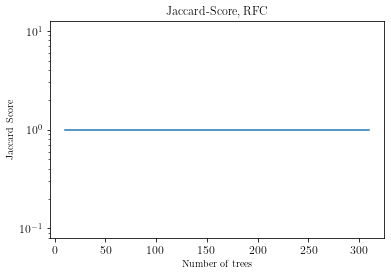

<Figure size 432x288 with 0 Axes>

In [15]:
N_trees = np.linspace(10, 310, 11, dtype=int).tolist()
# list with the numbers of trees to be tested

jac = []
# array in welchen jaccard index jeweils gespeichert wird


# jetzt die Schleife
for tree in N_trees:
    
    RFClf = ensemble.RandomForestClassifier(n_estimators=100)
    # generate classifier with tree trees
    
    RFClf.fit(X_train, y_train)
    # train classifier
    
    #y_pred = RFClf.predict_proba(X_test)
    # predict values for the test set
    
    #y_pred = y_pred[:, 1]
    # its vector
    
    rfc_Jscore = jaccard_score(y_test, RFClf.predict(X_test))
    # calculate score
    
    jac.append(rfc_Jscore)
    # berechne den jaccard score und speicher ihn ab
    
    print('jaccard score, RFC: ', rfc_Jscore, ' with ', tree, ' trees')
    # status update

    
jac_max = max(jac)
jac_maxpos = jac.index(jac_max)
trees = N_trees[jac_maxpos]
# save everithing related toi the maximal value

print('Maximal index, RFC: ', jac_max, ' at ', jac_maxpos)
print('With ', trees, 'trees')
# print the result


plt.plot(N_trees, jac)
plt.yscale('log')
plt.xlabel('Number of trees')
plt.ylabel('Jaccard Score')
plt.title('Jaccard-Score, RFC')
plt.show()
# make a beautiful plot to see if there is a trend

plt.clf()

run the random forest classifier with optimal trees

In [16]:
RFClf = ensemble.RandomForestClassifier(n_estimators=trees)
# generate classifier with 100 trees

RFClf.get_params()
# returns parameters of estimator in dictionary?

RFClf.fit(X_train, y_train)
# train classifier

y_pred = RFClf.predict_proba(X_test)
# predict values for the test set

y_pred = y_pred[:, 1]
# its vector

fpr1, tpr1, thr1 = roc_curve(y_test, y_pred)
# get estimates of accuracy (fp, tp, etc)

RFC_precision = precision_score(y_test, RFClf.predict(X_test))
RFC_eff = accuracy_score(y_test, RFClf.predict(X_test))
print('RFC accuracy score(sklearn) = ', RFC_eff)
print('RFC precision score(sklearn) = ', RFC_precision)
rfc_Jscore = jaccard_score(y_test, RFClf.predict(X_test))
print('jaccard score, RFC: ', rfc_Jscore)
# generate accuracy, precision and jaccard score

cv_score_rfc_eff = cross_val_score(RFClf, X, y, cv=5, scoring='recall')
print("Effizienz: %0.4f (+/- %0.4f)" % (cv_score_rfc_eff.mean(), cv_score_rfc_eff.std() * 2))
cv_score_rfc_rein = cross_val_score(RFClf, X, y, cv=5, scoring='precision')
print("Reinheit: %0.4f (+/- %0.4f)" % (cv_score_rfc_rein.mean(), cv_score_rfc_rein.std() * 2))
cv_score_rfc_J = cross_val_score(RFClf, X, y, cv=5, scoring='jaccard')
print("Jaccard Index: %0.4f (+/- %0.4f)" % (cv_score_rfc_J.mean(), cv_score_rfc_J.std() * 2))
#  efficiency, precision and jaccard index

RFC accuracy score(sklearn) =  1.0
RFC precision score(sklearn) =  1.0
jaccard score, RFC:  1.0
Effizienz: 0.8795 (+/- 0.4437)
Reinheit: 0.9982 (+/- 0.0060)
Jaccard Index: 0.9081 (+/- 0.3238)


KN Classifier

determine optimal nearest neighbours

jaccard score, RFC:  1.0  with  10  trees
jaccard score, RFC:  1.0  with  40  trees
jaccard score, RFC:  1.0  with  70  trees
jaccard score, RFC:  1.0  with  100  trees
jaccard score, RFC:  1.0  with  130  trees
jaccard score, RFC:  1.0  with  160  trees
jaccard score, RFC:  1.0  with  190  trees
jaccard score, RFC:  1.0  with  220  trees
jaccard score, RFC:  1.0  with  250  trees
jaccard score, RFC:  1.0  with  280  trees
jaccard score, RFC:  1.0  with  310  trees
Maximal index, RFC:  1.0  at  0
With  10  neighbours


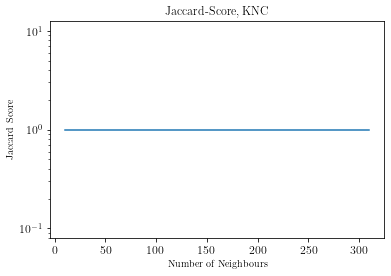

<Figure size 432x288 with 0 Axes>

In [17]:
N_neighbours = np.linspace(10, 310, 11, dtype=int).tolist()
# list with the numbers of trees to be tested

jac = []
# array in welchen jaccard index jeweils gespeichert wird


# jetzt die Schleife
for tree in N_neighbours:
    
    RFClf = ensemble.RandomForestClassifier(n_estimators=100)
    # generate classifier with tree trees
    
    RFClf.fit(X_train, y_train)
    # train classifier
    
    #y_pred = RFClf.predict_proba(X_test)
    # predict values for the test set
    
    #y_pred = y_pred[:, 1]
    # its vector
    
    rfc_Jscore = jaccard_score(y_test, RFClf.predict(X_test))
    # calculate score
    
    jac.append(rfc_Jscore)
    # berechne den jaccard score und speicher ihn ab
    
    print('jaccard score, RFC: ', rfc_Jscore, ' with ', tree, ' trees')
    # status update
    
jac_max = max(jac)
jac_maxpos = jac.index(jac_max)
neighbours = N_neighbours[jac_maxpos]
# save everithing related toi the maximal value

print('Maximal index, RFC: ', jac_max, ' at ', jac_maxpos)
print('With ', neighbours, ' neighbours')
# print the result


plt.plot(N_neighbours, jac)
plt.yscale('log')
plt.xlabel('Number of Neighbours')
plt.ylabel('Jaccard Score')
plt.title('Jaccard-Score, KNC')
plt.show()
# make a beautiful plot to see if there is a trend

plt.clf()

use the KN classifier

In [18]:
knn_clf = KNeighborsClassifier(n_neighbors=neighbours)
knn_clf.fit(X_train, y_train)
PRED_knn = knn_clf.predict_proba(X_test)
PRED_knn = PRED_knn[:, 1]
fpr2, tpr2, thr2 = roc_curve(y_test, PRED_knn)

knn_precision = precision_score(y_test, knn_clf.predict(X_test))
knn_eff = accuracy_score(y_test, knn_clf.predict(X_test))
print('KNN accuracy score(sklearn) = ', knn_eff)
print('KNN precision score(sklearn) = ', knn_precision)
knn_Jscore = jaccard_score(y_test, knn_clf.predict(X_test))
print('jaccard score, kNN: ', knn_Jscore)

cv_score_knn_eff = cross_val_score(knn_clf, X, y, cv=5, scoring='recall')
print('stop')
print("Effizienz: %0.4f (+/- %0.4f)" % (cv_score_knn_eff.mean(), cv_score_knn_eff.std() * 2))
print('stop')
cv_score_knn_rein = cross_val_score(knn_clf, X, y, cv=5, scoring='precision')
print('stop')
print("Reinheit: %0.4f (+/- %0.4f)" % (cv_score_knn_rein.mean(), cv_score_knn_rein.std() * 2))
print('stop')
cv_score_knn_J = cross_val_score(knn_clf, X, y, cv=5, scoring='jaccard')
print('stop')
print("Jaccard Index: %0.4f (+/- %0.4f)" % (cv_score_knn_J.mean(), cv_score_knn_J.std() * 2))


KNN accuracy score(sklearn) =  1.0
KNN precision score(sklearn) =  1.0
jaccard score, kNN:  1.0
stop
Effizienz: 0.0000 (+/- 0.0000)
stop


/home/felix/.local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/felix/.local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/felix/.local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/felix/.local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_cl

stop
Reinheit: 0.0000 (+/- 0.0000)
stop
stop
Jaccard Index: 0.0000 (+/- 0.0000)


finally use Bayes

In [19]:
NBClf = GaussianNB()
NBClf.fit(X_train, y_train)
NB_pred = NBClf.predict_proba(X_test)
NB_pred = NB_pred[:, 1]
fpr3, tpr3, thr3 = roc_curve(y_test, NB_pred)

NB_precision = precision_score(y_test, NBClf.predict(X_test))
NB_eff = accuracy_score(y_test, NBClf.predict(X_test))
print('NB accuracy score(sklearn) = ', NB_eff)
print('NB precision score(sklearn) = ', NB_precision)
NB_Jscore = jaccard_score(y_test, NBClf.predict(X_test))
print('jaccard score, NB: ', NB_Jscore)

cv_score_nb_eff = cross_val_score(NBClf, X, y, cv=5, scoring='recall')
print("Effizienz: %0.4f (+/- %0.4f)" % (cv_score_nb_eff.mean(), cv_score_nb_eff.std() * 2))
cv_score_nb_rein = cross_val_score(NBClf, X, y, cv=5, scoring='precision')
print("Reinheit: %0.4f (+/- %0.4f)" % (cv_score_nb_rein.mean(), cv_score_nb_rein.std() * 2))
cv_score_nb_J = cross_val_score(NBClf, X, y, cv=5, scoring='jaccard')
print("Jaccard Index: %0.4f (+/- %0.4f)" % (cv_score_nb_J.mean(), cv_score_nb_J.std() * 2))


NB accuracy score(sklearn) =  1.0
NB precision score(sklearn) =  1.0
jaccard score, NB:  1.0
Effizienz: 0.9884 (+/- 0.0100)
Reinheit: 1.0000 (+/- 0.0000)
Jaccard Index: 0.9884 (+/- 0.0100)


plot the results

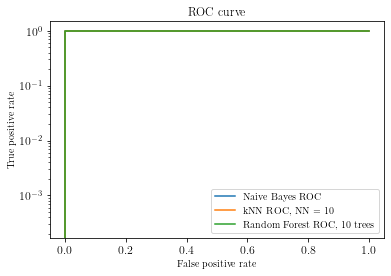

In [20]:
plt.plot(fpr3, tpr3, label='Naive Bayes ROC')
plt.plot(fpr2, tpr2, label='kNN ROC, NN = {}'.format(neighbours))
plt.plot(fpr1, tpr1, label='Random Forest ROC, {} trees'.format(trees))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.yscale('log')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()